# Which Car is Best ? Analysing and Predicting MOT Test Results

In this experiment, we will be analysing the MOT test results of cars in the UK. The MOT test is an annual test of vehicle safety, roadworthiness aspects and exhaust emissions required in the United Kingdom for most vehicles over three years old. The MOT test is designed to ensure that a vehicle is roadworthy and safe to drive. The test checks the vehicle against a number of criteria, including the condition of the vehicle's brakes, lights, tyres, exhaust emissions, and more.

The dataset we will be using in this experiment is the [UK MOT test results dataset](https://www.data.gov.uk/dataset/e3939ef8-30c7-4ca8-9c7c-ad9475cc9b2f/anonymised-mot-tests-and-results) for 2023. Information includes the make, model, and year of the car, as well as the overal test result.

Let us start by loading the dataset and taking a look at the first few rows.

In [1]:
# Load .data/mot/test_results.csv as a dataframe

import pandas as pd

mot = pd.read_csv('.data/mot/test_result.csv', sep='|')

# drop the test_id and vehicle_id columns
mot = mot.drop(['test_id'], axis=1)
mot

,vehicle_id,test_date,test_class_id,test_type,test_result,test_mileage,postcode_area,make,model,colour,fuel_type,cylinder_capacity,first_use_date
0,838565361,2023-01-02,4,NT,P,179357.0,NW,TOYOTA,PRIUS +,WHITE,HY,1798.0,2016-06-17
1,484499974,2023-01-01,4,NT,P,300072.0,B,TOYOTA,PRIUS,RED,HY,1500.0,2008-09-13
2,53988366,2023-01-02,4,NT,PRS,307888.0,HA,TOYOTA,PRIUS,GREY,HY,1497.0,2010-01-15
3,606755010,2023-01-02,4,NT,F,65810.0,SE,TOYOTA,PRIUS,SILVER,HY,1497.0,2007-03-28
4,606755010,2023-01-02,4,RT,P,65810.0,SE,TOYOTA,PRIUS,SILVER,HY,1497.0,2007-03-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42216716,1401380910,2023-12-31,4,NT,P,85583.0,EN,HONDA,BEAT,SILVER,PE,660.0,1999-10-01
42216717,625178603,2023-12-31,7,NT,P,227563.0,SK,RENAULT,MASTER,WHITE,DI,2298.0,2016-09-01
42216718,820545620,2023-12-31,4,NT,P,120115.0,S,PEUGEOT,207,SILVER,DI,1560.0,2010-01-21
42216719,941704896,2023-12-31,4,NT,P,141891.0,S,NISSAN,MICRA,RED,PE,1240.0,2009-06-25


Let us also load a few lookup tables that will help us in our analysis, and merge them with the main dataset.

In [2]:
# Load .data/mot/lookup/mdr_fuel_types.csv as a dataframe
fuel_types = pd.read_csv('.data/mot/lookup/mdr_fuel_types.csv', sep='|')

# Merge the two dataframes on the fuel_type column
mot = pd.merge(mot, fuel_types, left_on='fuel_type', right_on='type_code', how='left', suffixes=('', '_desc'))

# Load .data/mot/lookup/mdr_test_outcome.csv as a dataframe
test_outcome = pd.read_csv('.data/mot/lookup/mdr_test_outcome.csv', sep='|')
mot = pd.merge(mot, test_outcome, left_on='test_result', right_on='result_code', how='left', suffixes=('', '_desc'))
mot.drop(['type_code', 'result_code'], axis=1, inplace=True)
mot.rename(columns={'result': 'test_result_desc'}, inplace=True)
mot

,vehicle_id,test_date,test_class_id,test_type,test_result,test_mileage,postcode_area,make,model,colour,fuel_type,cylinder_capacity,first_use_date,fuel_type_desc,test_result_desc
0,838565361,2023-01-02,4,NT,P,179357.0,NW,TOYOTA,PRIUS +,WHITE,HY,1798.0,2016-06-17,Hybrid Electric (Clean),Passed
1,484499974,2023-01-01,4,NT,P,300072.0,B,TOYOTA,PRIUS,RED,HY,1500.0,2008-09-13,Hybrid Electric (Clean),Passed
2,53988366,2023-01-02,4,NT,PRS,307888.0,HA,TOYOTA,PRIUS,GREY,HY,1497.0,2010-01-15,Hybrid Electric (Clean),Pass with Rectification at Station
3,606755010,2023-01-02,4,NT,F,65810.0,SE,TOYOTA,PRIUS,SILVER,HY,1497.0,2007-03-28,Hybrid Electric (Clean),Failed
4,606755010,2023-01-02,4,RT,P,65810.0,SE,TOYOTA,PRIUS,SILVER,HY,1497.0,2007-03-28,Hybrid Electric (Clean),Passed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42216716,1401380910,2023-12-31,4,NT,P,85583.0,EN,HONDA,BEAT,SILVER,PE,660.0,1999-10-01,Petrol,Passed
42216717,625178603,2023-12-31,7,NT,P,227563.0,SK,RENAULT,MASTER,WHITE,DI,2298.0,2016-09-01,Diesel,Passed
42216718,820545620,2023-12-31,4,NT,P,120115.0,S,PEUGEOT,207,SILVER,DI,1560.0,2010-01-21,Diesel,Passed
42216719,941704896,2023-12-31,4,NT,P,141891.0,S,NISSAN,MICRA,RED,PE,1240.0,2009-06-25,Petrol,Passed


This is a reasonably large dataset with over 41 million rows and 13 columns. For this experiment, we will be focusing on a subset of cars - the top 20 most tested cars in the dataset. We will be analysing the test results of these cars and building a machine learning model to predict the test result of a car based on its features, including make, model and mileage.

## Pre-processing

First let us perform some simple pre-processing steps on the dataset, to remove any data that is not relevant to our analysis and to perform some basic tidying. We will also calculate a few additional columns that will be useful for our analysis.

In [3]:
# Drop any first_use and test_date before 1970, to avoid invalid ages due to the UNIX epoch
mot = mot[mot['first_use_date'] >= '1970-01-01']
mot = mot[mot['test_date'] >= '1970-01-01']

# Calculate an age column (in days) based on the test_date and first_use_date columns
mot['test_date'] = pd.to_datetime(mot['test_date'])
mot['first_use_date'] = pd.to_datetime(mot['first_use_date'])
mot['age'] = (mot['test_date'] - mot['first_use_date']).dt.days
mot['age_years'] = mot['age'] / 365.25

# Combine make and model into one column
mot['make_model'] = mot['make'] + ' ' + mot['model']  # Combine make and model into one column

# Let us focus on data where cylinder capacity is between 500 and 5000
mot = mot[(mot['cylinder_capacity'] >= 500) & (mot['cylinder_capacity'] <= 5000)]

# Drop any negative ages, as they are likely to be errors
mot = mot[mot['age'] >= 0]
mot

,vehicle_id,test_date,test_class_id,test_type,test_result,test_mileage,postcode_area,make,model,colour,fuel_type,cylinder_capacity,first_use_date,fuel_type_desc,test_result_desc,age,age_years,make_model
0,838565361,2023-01-02,4,NT,P,179357.0,NW,TOYOTA,PRIUS +,WHITE,HY,1798.0,2016-06-17,Hybrid Electric (Clean),Passed,2390,6.543463,TOYOTA PRIUS +
1,484499974,2023-01-01,4,NT,P,300072.0,B,TOYOTA,PRIUS,RED,HY,1500.0,2008-09-13,Hybrid Electric (Clean),Passed,5223,14.299795,TOYOTA PRIUS
2,53988366,2023-01-02,4,NT,PRS,307888.0,HA,TOYOTA,PRIUS,GREY,HY,1497.0,2010-01-15,Hybrid Electric (Clean),Pass with Rectification at Station,4735,12.963723,TOYOTA PRIUS
3,606755010,2023-01-02,4,NT,F,65810.0,SE,TOYOTA,PRIUS,SILVER,HY,1497.0,2007-03-28,Hybrid Electric (Clean),Failed,5759,15.767283,TOYOTA PRIUS
4,606755010,2023-01-02,4,RT,P,65810.0,SE,TOYOTA,PRIUS,SILVER,HY,1497.0,2007-03-28,Hybrid Electric (Clean),Passed,5759,15.767283,TOYOTA PRIUS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42216716,1401380910,2023-12-31,4,NT,P,85583.0,EN,HONDA,BEAT,SILVER,PE,660.0,1999-10-01,Petrol,Passed,8857,24.249144,HONDA BEAT
42216717,625178603,2023-12-31,7,NT,P,227563.0,SK,RENAULT,MASTER,WHITE,DI,2298.0,2016-09-01,Diesel,Passed,2677,7.329227,RENAULT MASTER
42216718,820545620,2023-12-31,4,NT,P,120115.0,S,PEUGEOT,207,SILVER,DI,1560.0,2010-01-21,Diesel,Passed,5092,13.941136,PEUGEOT 207
42216719,941704896,2023-12-31,4,NT,P,141891.0,S,NISSAN,MICRA,RED,PE,1240.0,2009-06-25,Petrol,Passed,5302,14.516085,NISSAN MICRA


We also want to drop any rows with missing values, as this will likely cause issues with our analysis and machine learning model.
 
```{tip}
In normal data analysis, it is important to handle missing values carefully, as they can have a significant impact on the results. In this case, we are dropping rows with missing values as a simple way to handle them, but in a real-world scenario, you may want to consider other methods such as imputation.
```

In [4]:
# Remove any rows with missing values
mot = mot.dropna()

That's looking better, and we now have a couple of more columns - a combined make and model column, and a column for the age of the car based on the first use date and the actual test date. Now let us sample the top 20 most tested cars from the dataset.

In [5]:
# Sample the data for only the top 20 make and model combinations
top_20 = mot['make_model'].value_counts().head(20).index
mot = mot[mot['make_model'].isin(top_20)]
mot

,vehicle_id,test_date,test_class_id,test_type,test_result,test_mileage,postcode_area,make,model,colour,fuel_type,cylinder_capacity,first_use_date,fuel_type_desc,test_result_desc,age,age_years,make_model
21,1493398641,2023-01-01,4,NT,P,41682.0,SR,NISSAN,JUKE,GREY,DI,1461.0,2016-05-13,Diesel,Passed,2424,6.636550,NISSAN JUKE
25,1200062230,2023-01-01,4,NT,P,91473.0,G,VOLKSWAGEN,GOLF,SILVER,DI,1598.0,2010-03-20,Diesel,Passed,4670,12.785763,VOLKSWAGEN GOLF
26,1237843361,2023-01-01,4,NT,PRS,162891.0,B,VOLKSWAGEN,TRANSPORTER,WHITE,DI,1968.0,2012-10-01,Diesel,Pass with Rectification at Station,3744,10.250513,VOLKSWAGEN TRANSPORTER
30,922055125,2023-01-01,4,NT,P,21153.0,CO,FORD,FOCUS,BLACK,PE,999.0,2020-01-31,Petrol,Passed,1066,2.918549,FORD FOCUS
37,534002476,2023-01-01,4,NT,PRS,103365.0,B,HONDA,JAZZ,BLUE,PE,1339.0,2004-03-04,Petrol,Pass with Rectification at Station,6877,18.828200,HONDA JAZZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42216701,700228101,2023-12-31,4,NT,PRS,105679.0,LU,NISSAN,JUKE,WHITE,PE,1598.0,2014-03-24,Petrol,Pass with Rectification at Station,3569,9.771389,NISSAN JUKE
42216705,677896545,2023-12-31,4,NT,P,169683.0,SA,AUDI,A3,RED,PE,1395.0,2014-12-16,Petrol,Passed,3302,9.040383,AUDI A3
42216709,541766398,2023-12-31,4,NT,P,79328.0,SP,VAUXHALL,ASTRA,BLACK,PE,1796.0,2008-03-06,Petrol,Passed,5778,15.819302,VAUXHALL ASTRA
42216710,144320145,2023-12-31,4,NT,P,53210.0,G,VAUXHALL,CORSA,RED,PE,1398.0,2019-05-31,Petrol,Passed,1675,4.585900,VAUXHALL CORSA


We are now down to just over 13 million rows, quite more manageable!

## Exploratory analysis

Let's try and gather some insights from the data. We will start by looking at the most common make/model combinations available in the data.

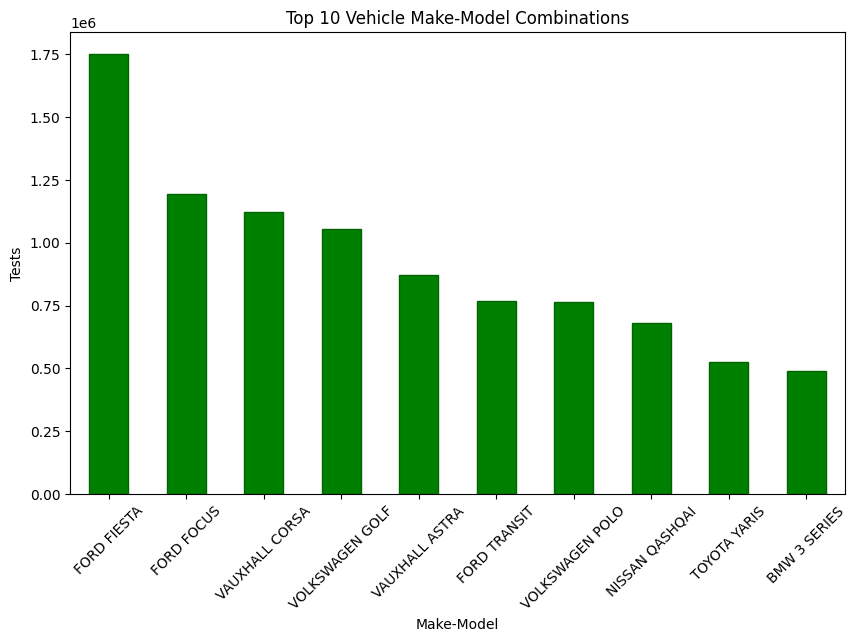

In [6]:
import matplotlib.pyplot as plt

# Calculate the top 10 most common make-model combinations
top_vehicles = mot['make_model'].value_counts().head(10)

# Plotting
plt.figure(figsize=(10, 6))
top_vehicles.plot(kind='bar', color='green', edgecolor='darkgreen')
plt.title('Top 10 Vehicle Make-Model Combinations')
plt.xlabel('Make-Model')
plt.ylabel('Tests')
plt.xticks(rotation=45)
plt.show()

That's interesting! The most common make/model combination is the Ford Fiesta, followed by the Ford Focus and the Vauxhall Corsa. These are all popular cars in the UK, so it makes sense that they are the most tested. Note that we are measuring *the number of tests* and not the number of cars, so it is possible that some cars have been tested multiple times.

Let's now perform a different visualisation which might be a bit more interesting, we will first show the distribution of car makes in relative terms as a treemap. In this case, let us remove any vehicle duplicates, so we only have one test per vehicle and therefore are comparing actual number of vehicles.

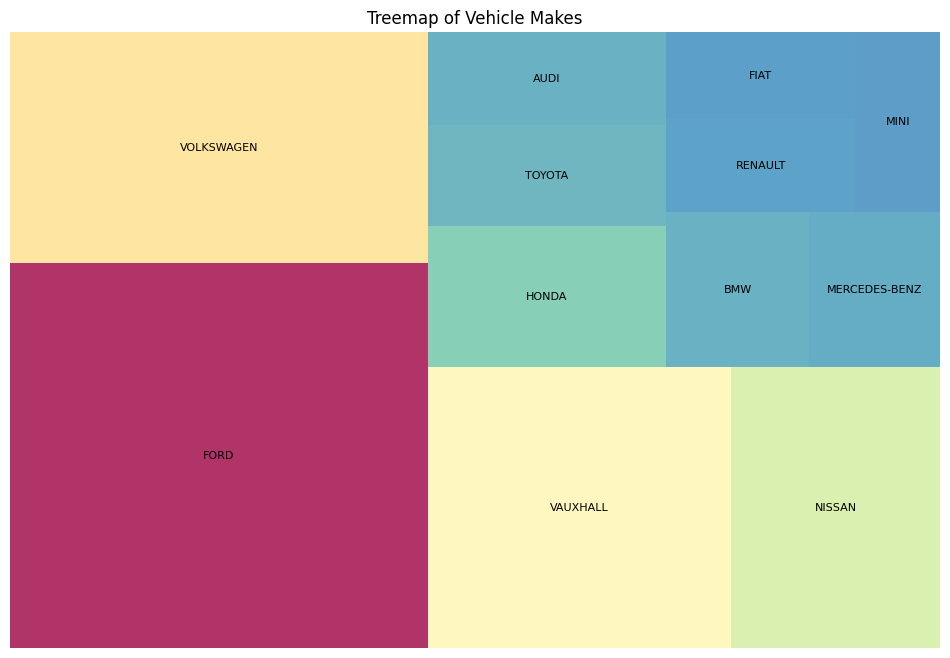

In [7]:
import squarify

# Calculate the top vehicle makes, while deduplicating for vehicle_id
counts = mot.drop_duplicates('vehicle_id')['make'].value_counts()

labels = counts.index
sizes = counts.values
colors = plt.cm.Spectral_r(sizes / max(sizes))  # Color coding by size

# Creating the treemap
plt.figure(figsize=(12, 8))
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.8, text_kwargs={'fontsize': 8})
plt.title('Treemap of Vehicle Makes')
plt.axis('off')  # Remove axes
plt.show()

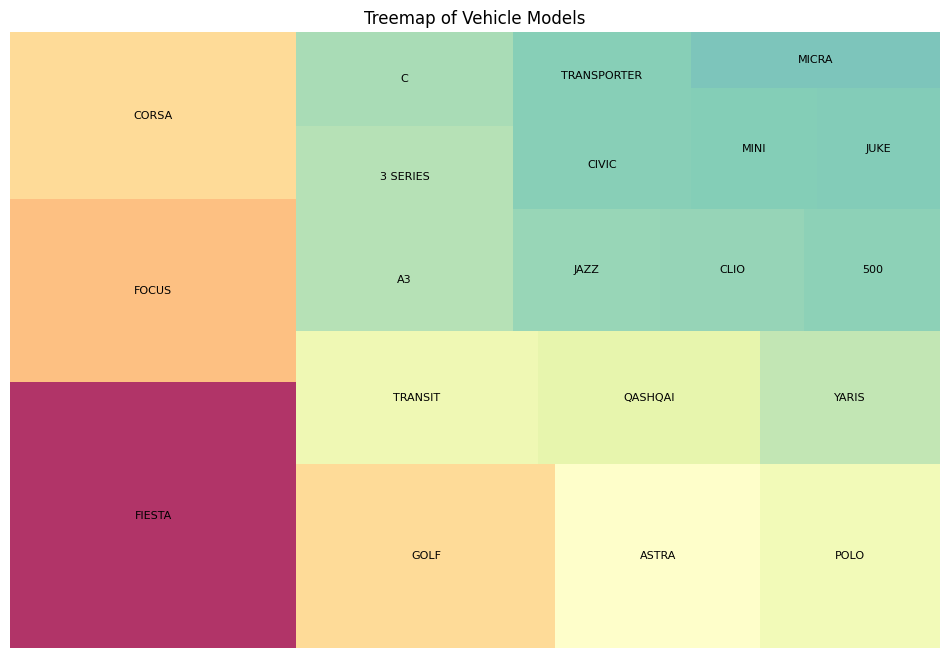

In [8]:
# Calculate the top vehicle models, while deduplicating for vehicle_id
counts = mot.drop_duplicates('vehicle_id')['model'].value_counts()

labels = counts.index
sizes = counts.values
colors = plt.cm.Spectral_r(sizes / max(sizes))  # Color coding by size

# Creating the treemap
plt.figure(figsize=(12, 8))
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.8, text_kwargs={'fontsize': 8})
plt.title('Treemap of Vehicle Models')
plt.axis('off')  # Remove axes
plt.show()

This is quite informative! We can really see the relative popularity of different models, and the color coding gives a great visual representation of the distribution of both makes and models.

Now let us look at how vehicle age, make and model is distributed - this will help us get a better picture of the test results for each make and model. First let us understand the overal distribution of vehicle age in the dataset, as an histogram.

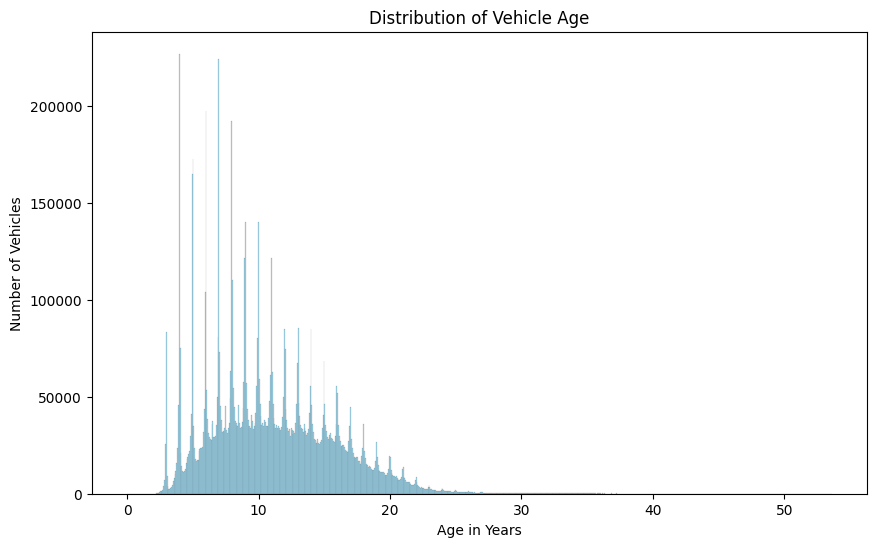

In [9]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(mot.drop_duplicates('vehicle_id')['age_years'], color='skyblue')
plt.title('Distribution of Vehicle Age')
plt.xlabel('Age in Years')
plt.ylabel('Number of Vehicles')
plt.show()


```{attention}
What do you think the spikes in the histogram represent?
```

Again, super informative. It would however be interesting to understand this as percentiles as well, so let us add that.

0.25     7.008898
0.50    10.193018
0.75    14.113621
0.95    19.512663
Name: age_years, dtype: float64


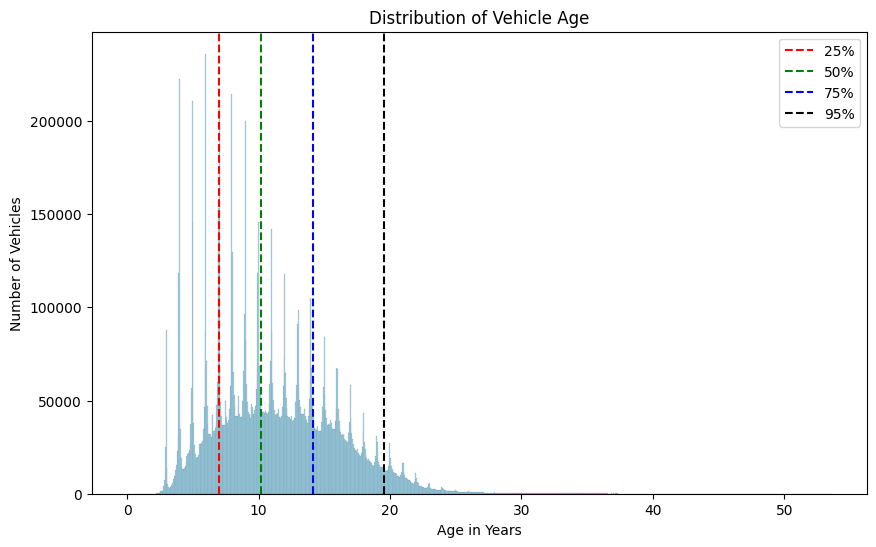

In [10]:
# Calculate and plot percentiles for the age_years column
percentiles = mot.drop_duplicates('vehicle_id')['age_years'].quantile([0.25, 0.5, 0.75, 0.95])
print(percentiles)

plt.figure(figsize=(10, 6))
sns.histplot(mot['age_years'], color='skyblue')
plt.axvline(percentiles.iloc[0], color='red', linestyle='--', label='25%')
plt.axvline(percentiles.iloc[1], color='green', linestyle='--', label='50%')
plt.axvline(percentiles.iloc[2], color='blue', linestyle='--', label='75%')
plt.axvline(percentiles.iloc[3], color='black', linestyle='--', label='95%')
plt.title('Distribution of Vehicle Age')
plt.xlabel('Age in Years')
plt.ylabel('Number of Vehicles')
plt.legend()
plt.show()

We conclude that only 25% of cars are newer than 7 years, and 50% are newer than 10 years. This information will be useful for our analysis, as we now know that half of the cars in the dataset are older than 10 years! Let us perform a similar analysis, but for mileage instead of age.

0.25     44135.0
0.50     70564.0
0.75    102259.0
0.95    157293.0
Name: test_mileage, dtype: float64


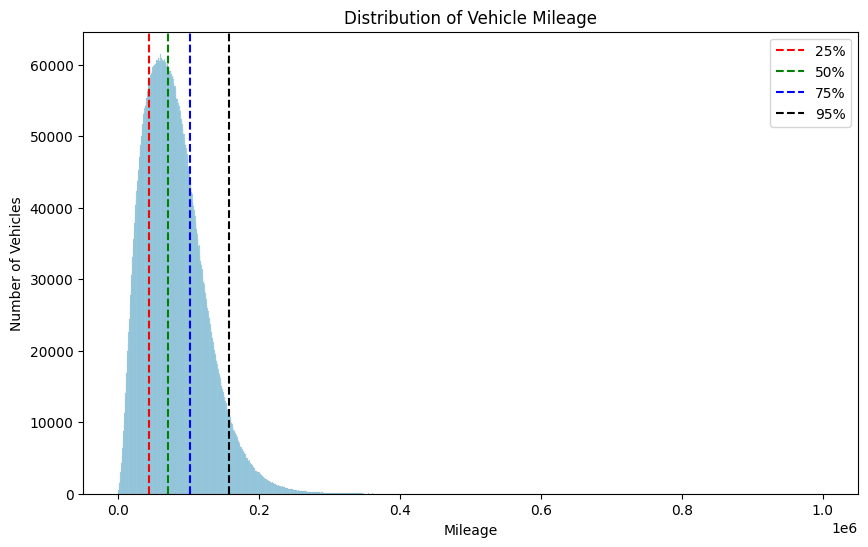

In [11]:
# Calculate and plot percentiles for the test_mileage column
percentiles = mot.drop_duplicates('vehicle_id')['test_mileage'].quantile([0.25, 0.5, 0.75, 0.95])
print(percentiles)

plt.figure(figsize=(10, 6))
sns.histplot(mot['test_mileage'], color='skyblue')
plt.axvline(percentiles.iloc[0], color='red', linestyle='--', label='25%')
plt.axvline(percentiles.iloc[1], color='green', linestyle='--', label='50%')
plt.axvline(percentiles.iloc[2], color='blue', linestyle='--', label='75%')
plt.axvline(percentiles.iloc[3], color='black', linestyle='--', label='95%')
plt.title('Distribution of Vehicle Mileage')
plt.xlabel('Mileage')
plt.ylabel('Number of Vehicles')
plt.legend()
plt.show()

Lots of information here. We can see that only 25% of cars have a mileage of less than aproximately 44000 miles, and half the cars have over 70000 miles on the clock! This is quite a lot of mileage, and it will be interesting to see how this affects the test results.

Let us now visually try to understand these distributions of age and mileage for each make and model. We are only ilustrating the visualisation technique, so let us look at age only - we could easily do the same for mileage. We will use a stacked histogram, where the `y` axis is the percentage of cars in each age group, and the `x` axis is the age of the car.

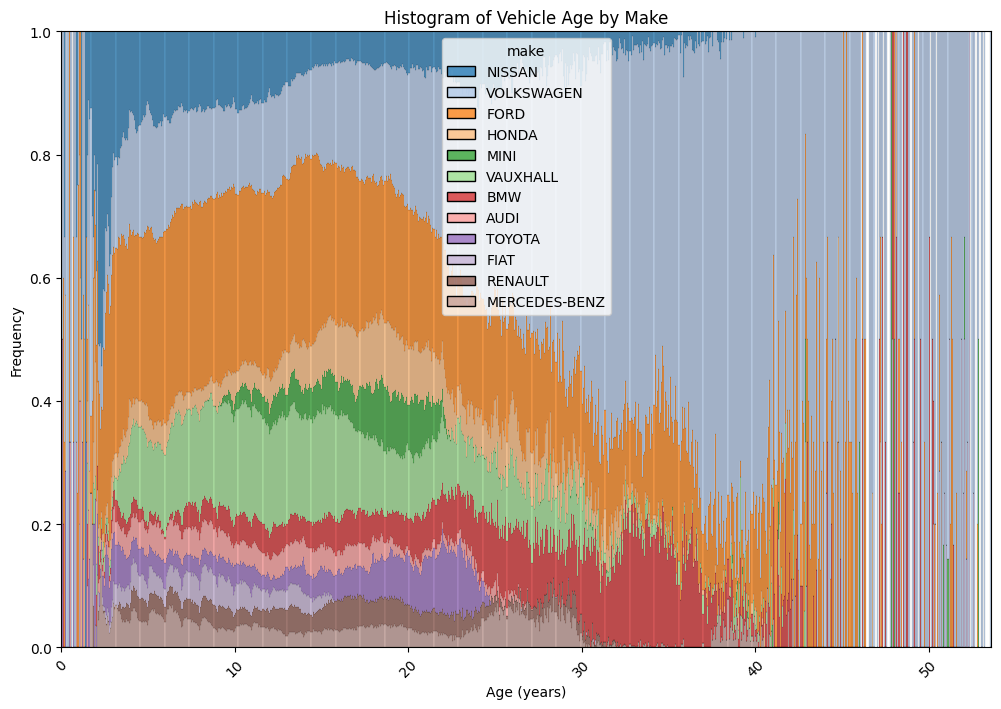

In [12]:
# Plot a matrix of histograms per make of the age of vehicles in years
plt.figure(figsize=(12, 8))
sns.histplot(data=mot, x='age_years', hue='make', multiple='fill', palette='tab20')
plt.title('Histogram of Vehicle Age by Make')
plt.xlabel('Age (years)')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

There are *a lot* of old Volkswagens out on the road! This is quite interesting, and we can see that the distribution of ages for different makes is very different, ilustrating the popularity of different makes over time, a little bit like reading tree rings!

Let us perform the same analysis, but for models instead of makes.

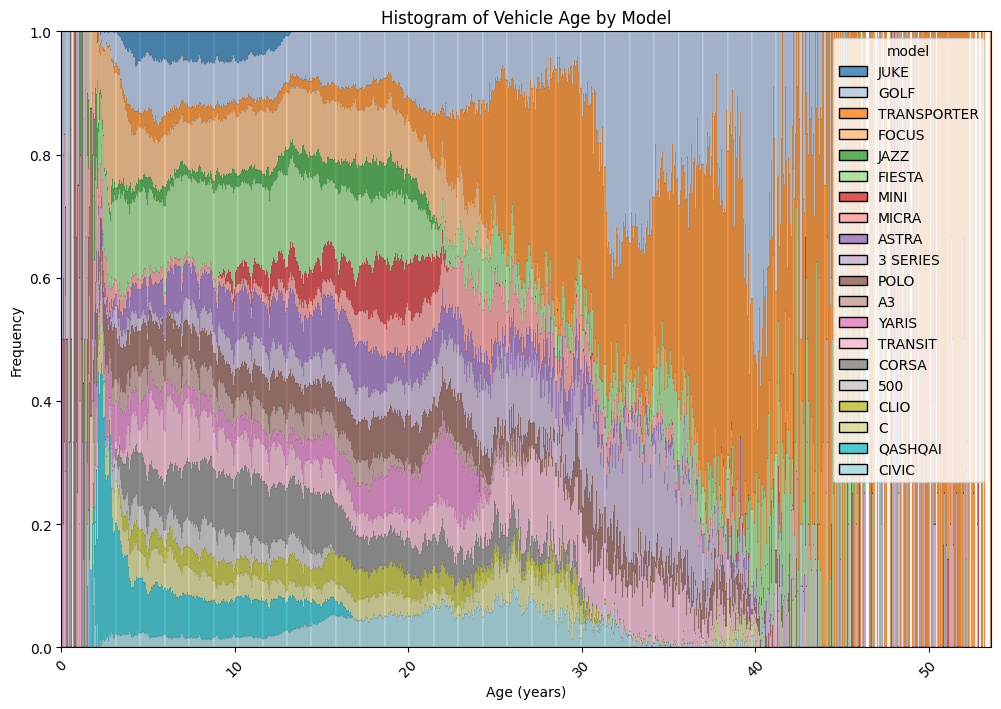

In [13]:
# Plot a matrix of histograms per model of the age of vehicles in years
plt.figure(figsize=(12, 8))
sns.histplot(data=mot, x='age_years', hue='model', multiple='fill', palette='tab20')
plt.title('Histogram of Vehicle Age by Model')
plt.xlabel('Age (years)')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

The number of Golf's and Transporter vans helps to explain the make distribution we saw before. The effect we see is quite striking, and just like car manufacturers, it ilustrates the popularity of different models over time, and how new car generations go out of circulation.

It would also be in interesting to understand which models have the highest mileage and age, so let us visualise this information as another datapoint for analysis. We will show average years as the `y` axis, color for average age, and the bubble size for average cylinder capacity.

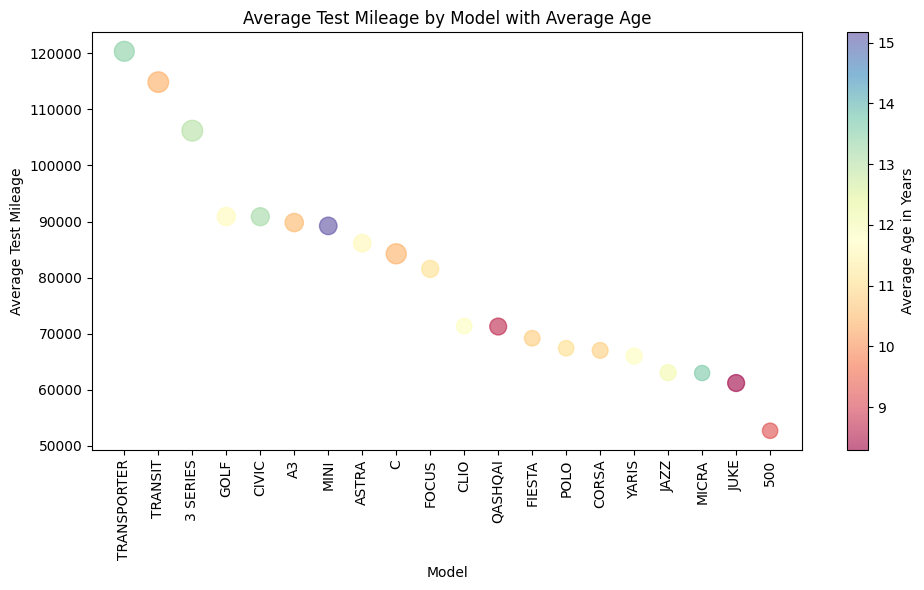

In [14]:
# Calculate the average test mileage
avg_mileage = mot.groupby(['model', 'make'])['test_mileage'].mean().reset_index()

# Calculate the average age in years for each model as a proxy for size
avg_age_years = mot.groupby(['model', 'make'])['age_years'].mean().reset_index()

# Calculate the average cylinder capacity for each model
avg_capacity = mot.groupby(['model', 'make'])['cylinder_capacity'].mean().reset_index()

# Merge the average mileage data with the average age years
merged_data = avg_mileage.merge(avg_age_years, on=['model', 'make'])

# Merge the merged data with the average capacity
merged_data = merged_data.merge(avg_capacity, on=['model', 'make'])

# Sort the data by average mileage
top_avg_mileage = merged_data.sort_values(by='test_mileage', ascending=False)

# Create a scatter plot
plt.figure(figsize=(10, 6))  # Set the figure size
scatter = plt.scatter(
    'model',  # x-axis
    'test_mileage',  # y-axis
    c=top_avg_mileage['age_years'],
    s = top_avg_mileage['cylinder_capacity']/10,  # Bubble size based on average cilinder capacity
    cmap='Spectral',  # Color map
    data=top_avg_mileage,  # Data source
    alpha=0.6,  # Transparency of the bubbles
)

# Add titles and labels
plt.title('Average Test Mileage by Model with Average Age')
plt.xlabel('Model')
plt.ylabel('Average Test Mileage')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Create colorbar
plt.colorbar(scatter, label='Average Age in Years')

# Show the plot
plt.tight_layout()
plt.show()


Unsurprisingly, vans have pretty high mileage and age, as they are often used for commercial purposes and tend to rack up a lot of miles. The color coding for average age is also interesting, as it shows that some models have a higher average age than others, even though they may not have the highest mileage (notice how these are small cars - typically used in cities for short journeys, such as the Micra, Jazz and Yaris).

### Understanding reliability

Now that we have a good understanding of the dataset, let us try to infer the reliability of different makes and models. Let us start by looking at manufacturers, by calculating the overall pass rate for each make.

```{warning}
This is a somewhat simplistic way to measure reliability, as it only considers the overall pass rate and does not take into account other factors that may affect reliability, such as the reason for the test failing. However, it can still provide some useful insights into the reliability of different makes. As an exercise, you could consider other ways to measure reliability from the available data in the dataset.
```

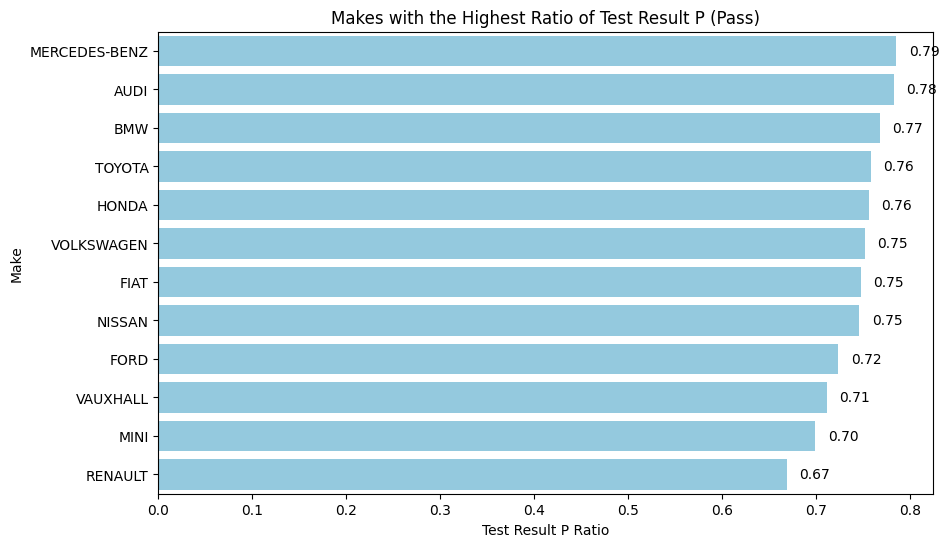

In [15]:

# Find the makes with the highest ratio of test_result = P
make_counts = mot['make'].value_counts()
make_p_counts = mot[mot['test_result'] == 'P']['make'].value_counts()
make_p_ratio = make_p_counts / make_counts
make_p_ratio = make_p_ratio.sort_values(ascending=False)

# Convert the Series to DataFrame for plotting
make_p_ratio_df = make_p_ratio.reset_index()
make_p_ratio_df.columns = ['Make', 'Test Result P Ratio']

plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    y='Make',  # Now 'Make' is on the y-axis
    x='Test Result P Ratio',  # And 'Test Result P Ratio' on the x-axis
    data=make_p_ratio_df,
    color='skyblue'
)

# Adding a title and labels
plt.title('Makes with the Highest Ratio of Test Result P (Pass)')
plt.ylabel('Make')  # Now this is the y-axis label
plt.xlabel('Test Result P Ratio')  # And this is the x-axis label

# This rotates the y-axis labels, which can be omitted if not necessary
plt.yticks(rotation=0)  # You can adjust the rotation for readability if needed

# Add value labels next to the bars
for p in barplot.patches:
    barplot.annotate(format(p.get_width(), '.2f'),  # Change to get_width() because width is the measure now
                     (p.get_width(), p.get_y() + p.get_height() / 2.),  # Adjust position to be at the end of the bar
                     ha='left', va='center',  # Align text to the left of the endpoint
                     xytext=(9, 0),  # Move text to the right a bit
                     textcoords='offset points')

barplot.set_facecolor('white')

# Show the plot
plt.show()

Surprisingly or unsurprisingly, it is the German manufacturers that have the highest pass rate, with [Mercedes leading the way](https://youtu.be/M5eNZ_f9tUU?si=mljRliRbG1AzSNIm&t=22). Again, this could reflect not just the quality of the cars, but also the type of cars that are tested, their average milleage, the type of drivers who typically drive them, etc. This is a good starting point for further analysis, which will be left as an exercise for the reader.

Let us now look at the pass rate for each model, to see if there are any particular models that stand out as being more reliable than others.

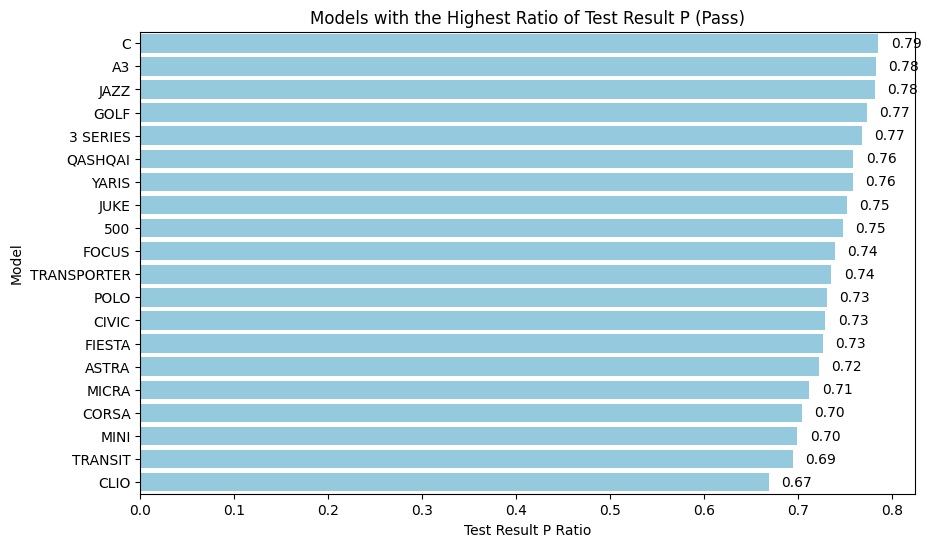

In [16]:

# Find the models with the highest ratio of test_result = P
model_counts = mot['model'].value_counts()
model_p_counts = mot[mot['test_result'] == 'P']['model'].value_counts()
model_p_ratio = model_p_counts / model_counts
model_p_ratio = model_p_ratio.sort_values(ascending=False)

# Convert the Series to DataFrame for plotting
model_p_ratio_df = model_p_ratio.reset_index()
model_p_ratio_df.columns = ['Model', 'Test Result P Ratio']

plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    y='Model',  # 'Model' is now on the y-axis
    x='Test Result P Ratio',  # 'Test Result P Ratio' is on the x-axis
    data=model_p_ratio_df,
    color='skyblue'
)

# Adding a title and labels
plt.title('Models with the Highest Ratio of Test Result P (Pass)')
plt.ylabel('Model')  # y-axis label is now 'Model'
plt.xlabel('Test Result P Ratio')  # x-axis label is 'Test Result P Ratio'

# No need to rotate y-axis labels in a horizontal plot
plt.yticks(rotation=0)

# Add value labels next to the bars
for p in barplot.patches:
    barplot.annotate(format(p.get_width(), '.2f'),  # Using get_width() for horizontal bars
                     (p.get_width(), p.get_y() + p.get_height() / 2.),  # Position at the end of the bar
                     ha='left', va='center',  # Align text to the left of the endpoint
                     xytext=(9, 0),  # Move text to the right a bit
                     textcoords='offset points')

barplot.set_facecolor('white')

# Show the plot
plt.show()

Well, it seems the Mercedes C-Class comes first, together with the Audi A3 and Honda Jazz. The Renault Clio seems to be the least reliable, but it is important to remember that this is just a simple measure of reliability and does not take into account other factors that may affect it.

## Fuel types

Do different types of fuel have an impact on the test results? Let us do some simple analysis to understand how fuel type variability might impact pass rates. Again, this is a simplistic analysis and does not take into account other factors that may affect the results. Let us plot average pass rates for each make, depending on the fuel type. This should give us some starting insights on how pass rates vary depending on manufacturer and fuel type.

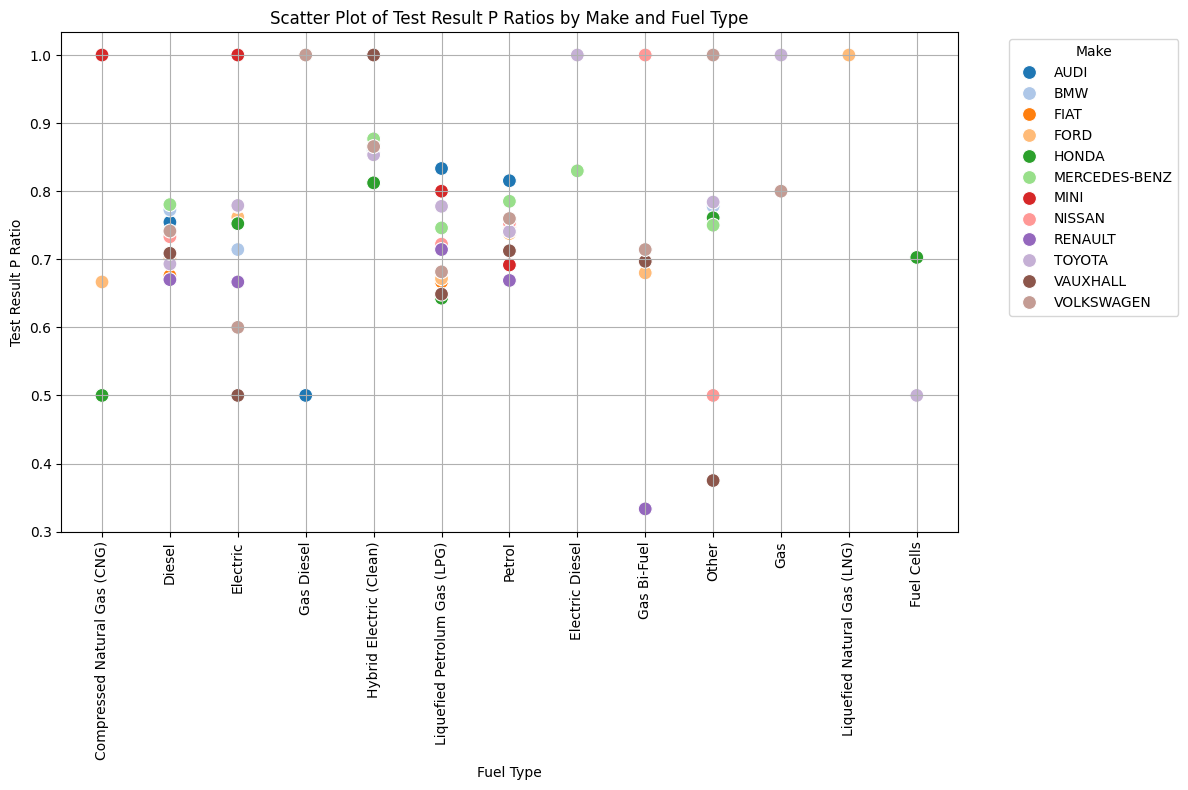

In [17]:

# Calculate counts and ratios as before, change to grouping by 'make'
make_fuel_counts = mot.groupby(['make', 'fuel_type_desc']).size()
make_p_fuel_counts = mot[mot['test_result'] == 'P'].groupby(['make', 'fuel_type_desc']).size()
make_p_ratio = make_p_fuel_counts / make_fuel_counts

# Resetting the index to turn the multi-index Series into a DataFrame
make_p_ratio_df = make_p_ratio.reset_index()
make_p_ratio_df.columns = ['Make', 'Fuel Type', 'Test Result P Ratio']

# Create a scatter plot
plt.figure(figsize=(12, 8))
scatter_plot = sns.scatterplot(
    x='Fuel Type',
    y='Test Result P Ratio',
    hue='Make',  # Differentiate by make
    data=make_p_ratio_df,
    palette='tab20',  # Color palette
    s=100  # Size of the markers
)

plt.title('Scatter Plot of Test Result P Ratios by Make and Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Test Result P Ratio')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(True)  # Add grid for easier visual alignment

# Moving the legend outside the plot area to the right
plt.legend(title='Make', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()  # Adjust the layout to make room for the legend
plt.show()

A few interesting points here:

- Diesel and petrol cars have a similar spread of pass rates, in the case of Audi - petrol cars have a higher pass rate than diesel cars (which is a bit surprising)
- Electric cars have a _lot_ of variability in pass rates, which could be explained by a small sample size
- Hybrid electrics have a very high pass rate, which is interesting and could be due to the fact that they are newer cars and therefore more likely to pass a MOT test (I'll leave this as an exercise for the reader to investigate further)

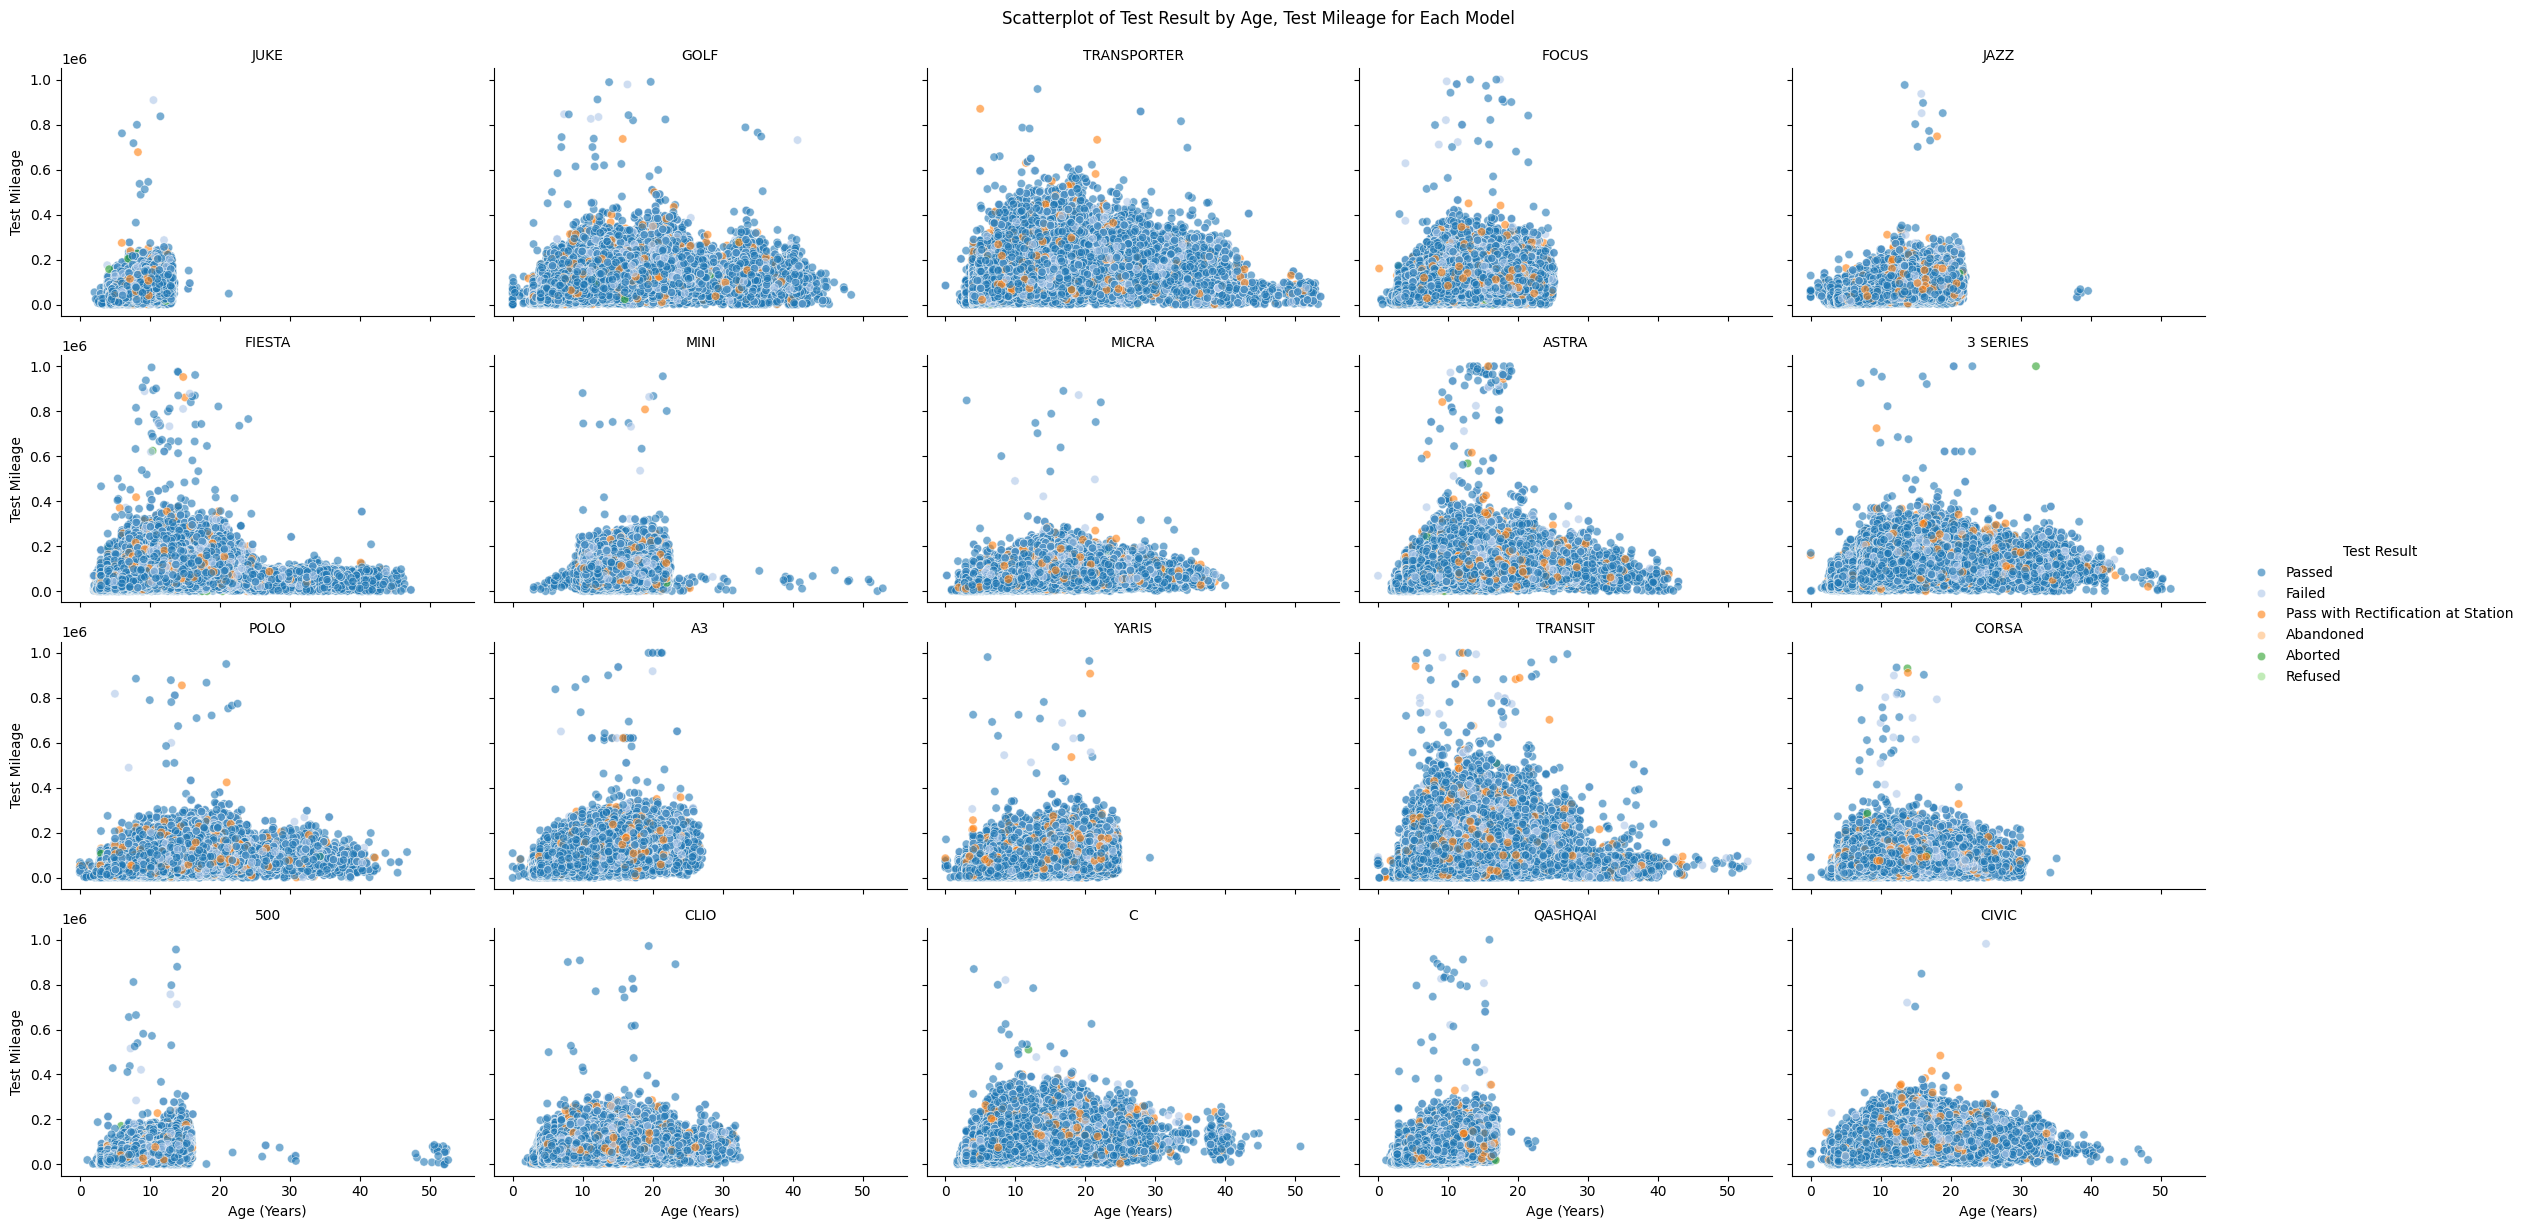

In [18]:
# Initialize a FacetGrid object
g = sns.FacetGrid(mot, col='model', col_wrap=5, aspect=1.5)

# Map the scatterplot with the Spectral colormap for the 'cylinder_capacity' which affects the color
g.map_dataframe(sns.scatterplot,
                'age_years',
                'test_mileage', 
                alpha=0.6,
                palette='tab20',
                hue='test_result_desc',
                hue_order=['Passed', 'Failed', 'Pass with Rectification at Station', 'Abandoned', 'Aborted', 'Refused']
               )

# Add titles and tweak adjustments
g.set_titles("{col_name}")  # Use model names as titles for each subplot
g.set_axis_labels("Age (Years)", "Test Mileage")  # Set common axis labels

# Add a legend and adjust layout
g.add_legend(title='Test Result')
g.tight_layout()

# Set the overall title
plt.suptitle('Scatterplot of Test Result by Age, Test Mileage for Each Model', y=1.02)

# Display the plots
plt.show()


To ensure we have a true representation of the original distribution, we will perform stratified sampling to ensure we have a balanced dataset.

```{tip}
Stratified sampling is a statistical method used to ensure that specific subgroups within a dataset are adequately represented when taking a sample. This approach involves dividing the entire population into different subgroups known as strata, which are based on shared characteristics. Once the population is divided, a sample is drawn from each stratum. 

The main reason for using stratified sampling is to capture the population heterogeneity in the sample. For example, if you were conducting a survey on a population consisting of both males and females and you know that their responses might vary significantly based on gender, stratified sampling allows you to ensure that both genders are properly represented in the sample according to their proportion in the full population. This method enhances the accuracy of the results since each subgroup is proportionally represented, and it also increases the overall efficiency of the sampling process because it can require fewer resources to achieve more precise results.

Stratified sampling is especially valuable when analysts need to ensure that smaller but important subgroups within the population are not overlooked. By ensuring that these subgroups are adequately sampled, researchers can draw more accurate and generalizable conclusions from their data analysis. This makes stratified sampling a preferred method in fields where precision in population representation is crucial, such as in medical research, market research, and social science studies.
```

In [19]:
from sklearn.model_selection import train_test_split

sample_fraction = 0.5   # Fraction of the data to sample

# Let us remove any test_result classes with less than 2 instances, as this will stop stratified sampling from working
class_counts = mot['test_result'].value_counts()
print(class_counts)
mot = mot[mot['test_result'].isin(class_counts[class_counts >= 2].index)]

# Use train_test_split to perform the stratified sampling
_, mot_encoded = train_test_split(
    mot, 
    test_size=sample_fraction, 
    stratify=mot['test_result'],  # Stratify by 'test_result' to keep the distribution
    random_state=42  # For reproducibility
)

class_counts = mot_encoded['test_result'].value_counts()
# Show the distribution of the test_result column
print(class_counts)
print(mot_encoded.shape)

test_result
P        9660944
F        2759342
PRS       689454
ABR         8690
ABA         1455
ABRVE          1
Name: count, dtype: int64
test_result
P      966095
F      275934
PRS     68945
ABR       869
ABA       146
Name: count, dtype: int64
(1311989, 18)


In [20]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
import time

le = LabelEncoder()
categorical_columns = ['make', 'model', 'fuel_type', 'postcode_area', 'test_result']
for col in categorical_columns:
    mot_encoded[col] = le.fit_transform(mot_encoded[col])

X = mot_encoded[['test_mileage', 'cylinder_capacity', 'age_years', 'make', 'model', 'fuel_type', 'postcode_area']]
y = mot_encoded['test_result']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Setting up parameter grids for each model
param_grid = {
    'RandomForest': {
        'model': RandomForestClassifier(random_state=42),
        'params': {
            'n_estimators': [50, 100],
            'max_depth': [10, 20, None]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
        'params': {
            'n_estimators': [50, 100],
            'max_depth': [5, 10],
            'learning_rate': [0.1, 0.01]
        }
    }
}

results = []

# Run GridSearchCV for each model
for model_name, mp in param_grid.items():
    print(f'Running GridSearchCV for {model_name}')
    start_time = time.time()
    skf = StratifiedKFold(n_splits=2)  # Adjusted to 2 to match the smallest class size
    clf = GridSearchCV(mp['model'], mp['params'], cv=skf, scoring='accuracy', verbose=1, n_jobs=-1)
    clf.fit(X_train, y_train)
    results.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    elapsed_time = time.time() - start_time  # Correctly compute the elapsed time
    print(f'{model_name} best params: {clf.best_params_}, best score: {clf.best_score_}, time: {elapsed_time} seconds')

# Display results
results_df = pd.DataFrame(results)
print(results_df)

Running GridSearchCV for RandomForest
Fitting 2 folds for each of 6 candidates, totalling 12 fits
RandomForest best params: {'max_depth': 10, 'n_estimators': 100}, best score: 0.7363763599351572, time: 205.02397274971008 seconds
Running GridSearchCV for XGBoost
Fitting 2 folds for each of 8 candidates, totalling 16 fits
XGBoost best params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}, best score: 0.7363763599351572, time: 46.91486406326294 seconds
          model  best_score                                        best_params
0  RandomForest    0.736376             {'max_depth': 10, 'n_estimators': 100}
1       XGBoost    0.736376  {'learning_rate': 0.1, 'max_depth': 5, 'n_esti...
